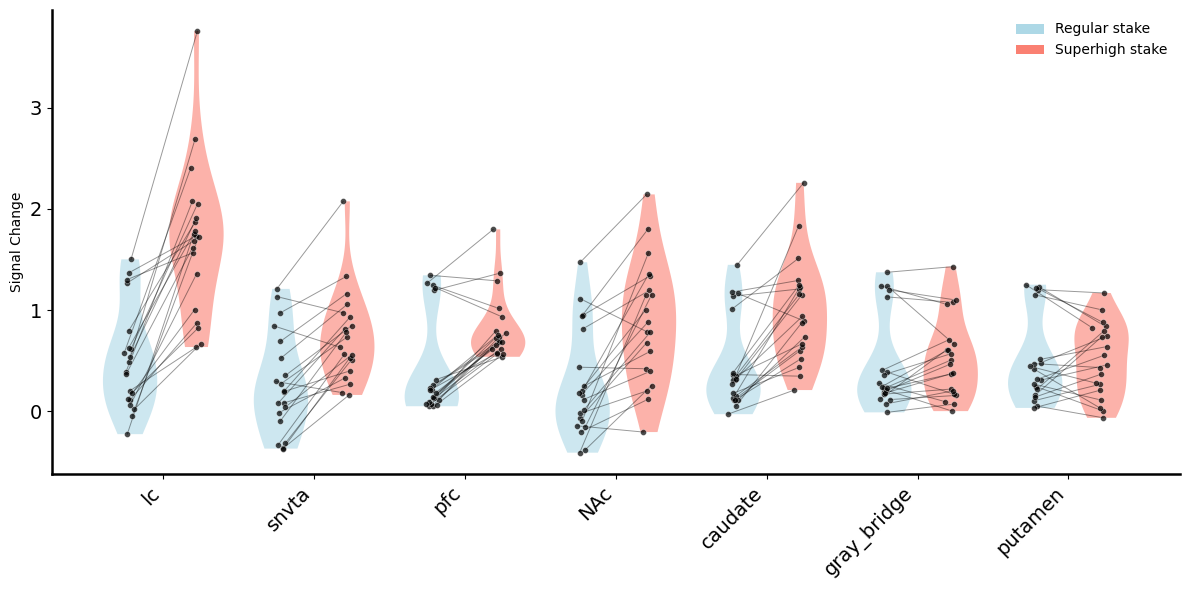

In [ ]:
# %% Load saved source data and reproduce Fig 2A violin (from SourceData_Wide)
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.patches import Patch

in_xlsx = os.path.join(data_dir, "output", "SourceData_Fig2A_stakes.xlsx")

# Load wide source data
df_wide_in = pd.read_excel(in_xlsx, sheet_name="SourceData_Wide")

roi_order = ["lc", "snvta", "pfc", "NAc", "caudate", "gray_bridge", "putamen"]
coef_list1 = ["Regular stake", "Superhigh stake"]  # legend labels

# Reconstruct all_roi_low_subject / all_roi_high_subject in the same order
all_roi_low_subject  = [df_wide_in[f"RG_{r}"].to_numpy(dtype=float) for r in roi_order]
all_roi_high_subject = [df_wide_in[f"SH_{r}"].to_numpy(dtype=float) for r in roi_order]

# For y-limits similar to your original logic (mean ± SEM)
all_roi_data = []
all_roi_sem  = []
for i in range(len(roi_order)):
    low  = all_roi_low_subject[i]
    high = all_roi_high_subject[i]
    # SEM computed on non-NaN values (not necessarily paired)
    low_sem  = np.nanstd(low, ddof=1)  / np.sqrt(np.sum(np.isfinite(low)))  if np.sum(np.isfinite(low))  > 1 else np.nan
    high_sem = np.nanstd(high, ddof=1) / np.sqrt(np.sum(np.isfinite(high))) if np.sum(np.isfinite(high)) > 1 else np.nan
    all_roi_data.append([np.nanmean(low), np.nanmean(high)])
    all_roi_sem.append([low_sem, high_sem])
all_roi_data = np.asarray(all_roi_data, float)
all_roi_sem  = np.asarray(all_roi_sem, float)

# --- Violin plot (same structure as your original) ---
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(roi_order))
offset = 0.22
vwidth = 0.36
low_color  = "lightblue"
high_color = "salmon"

max_y = np.nanmax(all_roi_data + all_roi_sem)
min_y = np.nanmin(all_roi_data - all_roi_sem)

for i, roi_name in enumerate(roi_order):
    low  = np.asarray(all_roi_low_subject[i],  float)
    high = np.asarray(all_roi_high_subject[i], float)

    parts = ax.violinplot([low, high],
                          positions=[x[i] - offset, x[i] + offset],
                          widths=vwidth,
                          showmeans=False, showmedians=False, showextrema=False)
    parts["bodies"][0].set_facecolor(low_color);  parts["bodies"][0].set_alpha(0.6); parts["bodies"][0].set_edgecolor("none")
    parts["bodies"][1].set_facecolor(high_color); parts["bodies"][1].set_alpha(0.6); parts["bodies"][1].set_edgecolor("none")

    rng = np.random.default_rng(7 + i)

    low_v  = np.asarray(low,  float)
    high_v = np.asarray(high, float)

    mask  = np.isfinite(low_v) & np.isfinite(high_v)
    low_p  = low_v[mask]
    high_p = high_v[mask]

    base_jit = rng.normal(0, 0.02, size=low_p.size)
    x_low  = x[i] - offset + base_jit
    x_high = x[i] + offset + base_jit

    for xl, xh, yl, yh in zip(x_low, x_high, low_p, high_p):
        ax.plot([xl, xh], [yl, yh], color="k", alpha=0.4, lw=0.7, zorder=4)

    ax.scatter(x_low,  low_p,  s=18, alpha=0.7, color="k",
               linewidth=0.3, edgecolor="white", zorder=5)
    ax.scatter(x_high, high_p, s=18, alpha=0.7, color="k",
               linewidth=0.3, edgecolor="white", zorder=5)

ax.set_xticks(x)
ax.set_xticklabels(roi_order, rotation=45, ha="right")
ax.set_ylabel("Signal Change")
ax.tick_params(axis="y", labelsize=14)
ax.tick_params(axis="x", labelsize=14)
ax.yaxis.set_major_locator(MaxNLocator(5))

ax.legend(handles=[Patch(facecolor=low_color,  label=coef_list1[0]),
                   Patch(facecolor=high_color, label=coef_list1[1])],
          frameon=False)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(1.8)
ax.spines["bottom"].set_linewidth(1.8)

plt.tight_layout()
plt.savefig(os.path.join(data_dir, "output", "roi_stake_violin_from_source.xlsx.png"),
            dpi=300, bbox_inches="tight")
plt.show()